#Random Forest


## Importación de librerías y datos

Por medio de nuestra libería ESIOS_contoller.py importamos nuestro último dataset de datos y lo parseamos para su uso. Sirve tanto como para Drive como jupiter.

In [1]:
import json, urllib, datetime, pickle, time
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn.metrics import *
from keras.models import *
from keras.layers import *
from sklearn.preprocessing import *
from keras.optimizers import *
from scipy.stats import *
from importlib.machinery import SourceFileLoader
from math import sqrt


try:
  from google.colab import drive
  drive.mount('/content/drive')
  path = '/content/drive/My Drive/TFM/01.Utils/ESIOS_contoller.py'
  in_colab = True
except:
  path = '../utils/ESIOS_contoller.py'
  in_colab = False
  

esios_assembler = SourceFileLoader('esios', path).load_module()

esios_controller = esios_assembler.ESIOS(in_colab)
data_consumo = esios_controller.get_data('non-secuencial')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
Mostrando los datos de data_total_for_non_serial.csv
(30555, 34)
________________________________________________________________________________


## Preparación de los datos

In [22]:
x_data = esios_controller.get_data_real_time()
y_data = esios_controller.get_target_data()

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(x_data, y_data, test_size=0.33, shuffle=False)

#Reshape for the LSTM
x_train = x_train.to_numpy()
x_valid = x_valid.to_numpy()
y_train = y_train.to_numpy()
y_valid = y_valid.to_numpy()

print('Xtrain_dim:', x_train.shape)
print('Ytrain_dim:', y_train.shape)

Xtrain_dim: (20471, 30)
Ytrain_dim: (20471, 1)


## Modelos

### Randon Forest regressor sin Normalizar

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regressor = RandomForestRegressor(random_state=0, n_estimators=100)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

#### Metrics


In [0]:
esios_controller.get_metrics(y_valid, regressor.predict(x_valid))

** --------------- Metrics: --------------- **
MSE:  91.83243530762302
RMSE:  9.582924152241999
MAE:  6.249774781832609
Log_MSE:  0.0575167702931859
MedianAE:  4.776250000000047


/content/drive/My Drive/TFM/01.Utils/ESIOS_contoller.py:125: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(abs((y_real-y_pred)/y_real))*100


MAPE:  inf %
SMAPE:  9.778826476681123 %
Variance:  0.43944756854970424
Max Error:  116.1001
** ---------------------------------------- **


#### Plot


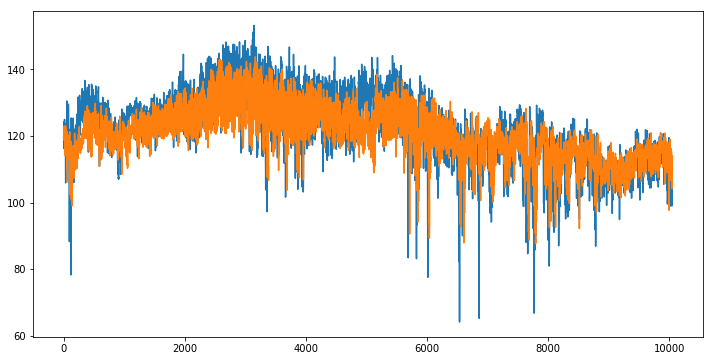

In [0]:
plt.figure(figsize=(12, 6))
last_non_0 = np.shape(y_valid)[0] - 30
plt.plot(y_valid[:last_non_0], label='real data')
plt.plot(regressor.predict(x_valid)[:last_non_0], label='pred data') 

### Randon Forest regressor Normalizado

In [0]:
scaler = StandardScaler()
x_train_est = scaler.fit_transform(x_train)
y_train_est = scaler.fit_transform(y_train)

In [0]:


regressor_standarized = RandomForestRegressor(random_state=0, n_estimators=100)
regressor_standarized.fit(x_train_est, y_train_est)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

#### Metrics


In [0]:
x_test_est = scaler.fit_transform(x_valid)
y_test_est = scaler.fit_transform(y_valid)

x_predict = regressor_standarized.predict(x_test_est)
x_predict_trans = scaler.inverse_transform(x_predict)
y_predict_trans = scaler.inverse_transform(y_test_est)

esios_controller.get_metrics(y_predict_trans, x_predict_trans)

** --------------- Metrics: --------------- **
MSE:  90.69391596528756
RMSE:  9.523335338277633
MAE:  6.046259531385167
Log_MSE:  0.05729151665462655
MedianAE:  4.398898049174491
MAPE:  2040438420356180.8 %
SMAPE:  9.75057773596442 %
Variance:  0.4401896115097036
Max Error:  114.70320915683128
** ---------------------------------------- **


#### Plot


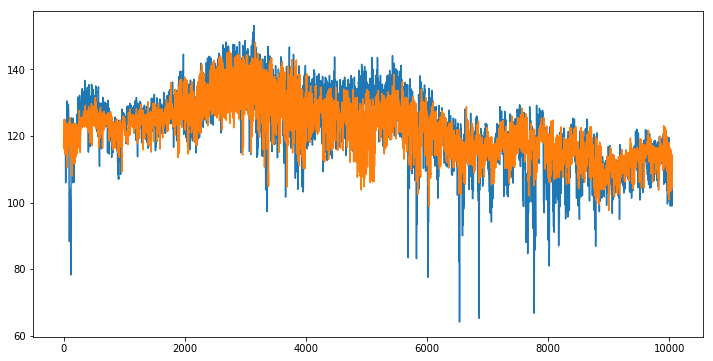

In [0]:
plt.figure(figsize=(12, 6))
last_non_0 = np.shape(y_valid)[0] - 30

x_predict_trans = scaler.inverse_transform(x_predict)
y_predict_trans = scaler.inverse_transform(y_test_est)
plt.plot(y_predict_trans[:last_non_0], label='real data')
plt.plot(x_predict_trans[:last_non_0], label='pred data') 

## Optimización de modelos

In [0]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [10, 100, 150, 200, 300, 500, 600, 750, 1000]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators}
param_grid = {'max_features': max_features}
param_grid = {'max_depth': max_depth}
param_grid = {'min_samples_split': min_samples_split}
param_grid = {'min_samples_leaf': min_samples_leaf}
param_grid = {'bootstrap': bootstrap, 
             'min_samples_leaf': min_samples_leaf}

clf = GridSearchCV(regressor, param_grid, cv=2)
clf.fit(x_train, y_train)

In [0]:
 print(clf.best_params_)

### Mejores resultados
* {'n_estimators': 1000}
* {'max_features': 'auto'}
* {'max_depth': 20}
* {'min_samples_split': 2}
* {'min_samples_leaf': 4}
* {'bootstrap': True}



### Randon Forest regressor Normalizado y optimo

In [24]:
regressor_optimun = RandomForestRegressor(
    random_state=0,
    n_estimators=300,
    max_features='auto',
    min_samples_split=2,
    min_samples_leaf=4,
    bootstrap=True
)
regressor_optimun.fit(x_train_est, y_train_est)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

#### Metrics


In [25]:
x_test_est = scaler.fit_transform(x_valid)
y_test_est = scaler.fit_transform(y_valid)

x_predict = regressor_optimun.predict(x_test_est)
x_predict_trans = scaler.inverse_transform(x_predict)
y_predict_trans = scaler.inverse_transform(y_test_est)

esios_controller.get_metrics(y_predict_trans[:last_non_0], x_predict_trans[:last_non_0])

** --------------- Metrics: --------------- **
MSE:  66.51078665479349
RMSE:  8.155414560572227
MAE:  5.838104187124348
Log_MSE:  0.005295747553172242
MedianAE:  4.282805833126844
MAPE:  6.871697900977924 %
SMAPE:  6.700714807965333 %
Variance:  0.29782237113402843
Max Error:  37.78230833454157
** ---------------------------------------- **


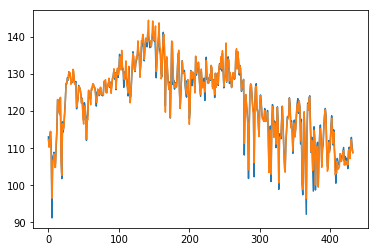

In [21]:
plt.plot(y_predict_trans[:last_non_0], label='real data')
plt.plot(x_predict_trans[:last_non_0], label='pred data') 

In [19]:
np.shape(y_predict_trans[:last_non_0])

(433, 1)

In [20]:
np.shape(y_predict_trans)

(463, 1)

#### Plot


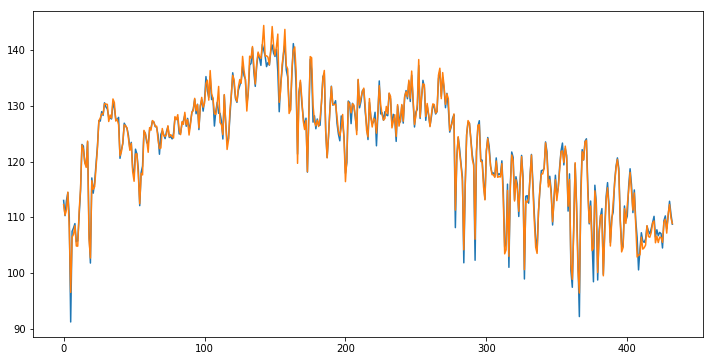

In [17]:
plt.figure(figsize=(12, 6))
last_non_0 = np.shape(y_valid)[0] - 30

x_predict_trans = scaler.inverse_transform(x_predict)
y_predict_trans = scaler.inverse_transform(y_test_est)
plt.plot(y_predict_trans[:last_non_0], label='real data')
plt.plot(x_predict_trans[:last_non_0], label='pred data') 

## Predicción del modelo diario

In [4]:
x_data_grouped = esios_controller.get_df_daily()
y_data_grouped = esios_controller.get_df_daily_all_day_prices()


x_data_grouped = x_data_grouped.drop('PVPC-target', axis=1)
y_data_grouped = x_data_grouped['PVPC_DEF']
y_data_grouped = y_data_grouped.shift(periods=1)
y_data_grouped[0] = y_data_grouped[1]

x_train, x_valid, y_train, y_valid = train_test_split(x_data_grouped, y_data_grouped, test_size=0.33, shuffle=False)

print('Xtrain_dim:', x_train.shape)
print('Ytrain_dim:', y_train.shape)

Xtrain_dim: (938, 31)
Ytrain_dim: (938,)


In [0]:
y_train = pd.DataFrame(y_train)
y_valid = pd.DataFrame(y_valid)

scaler = StandardScaler()
x_train_est = scaler.fit_transform(x_train)
y_train_est = scaler.fit_transform(y_train)

### Randon Forest regressor Normalizado y diario

In [6]:
regressor_optimun = RandomForestRegressor(
    random_state=0,
    n_estimators=300,
    max_features='auto',
    min_samples_split=2,
    min_samples_leaf=4,
    bootstrap=True
)
regressor_optimun.fit(x_train_est, y_train_est)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

#### Metrics


In [7]:
x_test_est = scaler.fit_transform(x_valid)
y_test_est = scaler.fit_transform(y_valid)

x_predict = regressor_optimun.predict(x_test_est)
x_predict_trans = scaler.inverse_transform(x_predict)
y_predict_trans = scaler.inverse_transform(y_test_est)

esios_controller.get_metrics(y_predict_trans, x_predict_trans)

** --------------- Metrics: --------------- **
MSE:  1.1826281196165358
RMSE:  1.087487066413452
MAE:  0.7377465764851341
Log_MSE:  8.590780179061559e-05
MedianAE:  0.5368447645011969
MAPE:  9.547044076989469 %
SMAPE:  9.47589227732376 %
Variance:  0.9880195027810966
Max Error:  6.738207115735207
** ---------------------------------------- **


#### Métricas a 24h

In [8]:
predictions = pd.DataFrame(x_predict_trans)
predictions['Holiday'] = x_data_grouped[-463:]['Holiday'].values
np.shape(predictions)

(463, 2)

In [9]:
encoder = esios_controller.load_keras_model('/content/drive/My Drive/TFM/01.Utils/data/Encoder.json')

/content/drive/My Drive/TFM/01.Utils/data/Encoder.json








Loaded model from disk


In [10]:
all_day_real_preds = encoder.predict(predictions);
print(np.shape(all_day_real_preds))

(463, 24)


In [11]:
y_data_target = esios_controller.get_df_daily_target_day_prics()
y_data_target = pd.DataFrame(y_data_target.values.tolist(), columns=['h'+str(i) for i in range(24)])

y_data_target_for_test = y_data_target[-463:]
np.shape(y_data_target_for_test)

(463, 24)

In [14]:
import math
pred = list()
real = list()

day_key = 0
for day in y_data_target_for_test.values:
  hour_key = 0
  for hour in day:
    if not math.isnan(hour) and hour != 0:
      real.append(hour)
      pred.append(all_day_real_preds[day_key][hour_key])
    hour_key += 1 
  day_key += 1  
  
  
print(np.shape(pred))
print(np.shape(real))  

(10349,)
(10349,)


#### Metrics 24h


In [15]:
esios_controller.get_metrics(pd.DataFrame(real), pd.DataFrame(pred))

** --------------- Metrics: --------------- **
MSE:  77.22869813863628
RMSE:  8.787986011518013
MAE:  6.534118866754138
Log_MSE:  0.0057280340254166106
MedianAE:  4.903269653320308
MAPE:  0    5.562564
dtype: float64 %
SMAPE:  0    5.491334
dtype: float64 %
Variance:  0.4061413007124416
Max Error:  53.50781768798828
** ---------------------------------------- **


#### Plot 24h


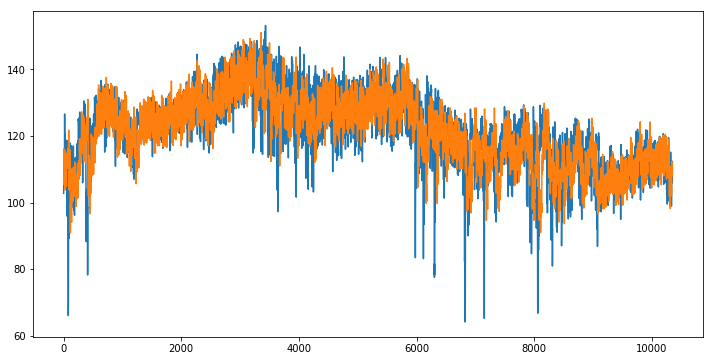

In [0]:
plt.figure(figsize=(12, 6))
last_non_0 = np.shape(pred)[0] - 24

plt.plot(real[:last_non_0], label='real data')
plt.plot(pred[:last_non_0], label='pred data') 

## Resultados

### RF sin estandarizar

MSE:  91.83243530762302

RMSE:  9.582924152241999

MAPE:  inf %

SMAPE:  9.778826476681123 


### RF estandarizado

MSE:  90.69391596528756

RMSE:  9.523335338277633

MAPE:  2040438420356180.8 %

SMAPE:  9.75057773596442 %


### RF estandarizado y optimo
MSE:  86.2995694113901

RMSE:  9.289756154571018

MAPE:  2043608693530394.5 %

SMAPE:  9.686317058460416 %


**MEJOR RESULTADO!**

### RF diario estandarizado y optimo

MSE:  103.76644625738719

RMSE:  10.186581676764153

MAPE:  0    inf

SMAPE:  0    5.941369

